In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

## running the model

In [3]:
from Regard import init
args = init(verbose=1)
print('Parameters=', args)

path = '_Regard.pt'

Parameters= {'batch_size': 16, 'test_batch_size': 1, 'valid_size': 0.2, 'epochs': 100, 'lr': 0.005, 'momentum': 0.48, 'no_cuda': True, 'num_processes': 1, 'seed': 42, 'log_interval': 10, 'dimension': 25, 'verbose': 1, 'conv1_dim': 4, 'conv1_kernel_size': 7, 'conv2_dim': 13, 'conv2_kernel_size': 5, 'stride1': 2, 'stride2': 2, 'crop': 200, 'size': 128, 'mean': 0.36, 'std': 0.3}


In [4]:
!ls -l {path}
!rm {path}

ls: _Regard.pt: No such file or directory
rm: _Regard.pt: No such file or directory


In [5]:
from Regard import ML
ml = ML(args)

import os
import torch
if os.path.isfile(path):
    ml.model.load_state_dict(torch.load(path))
    print('Loading file', path)
else:
    print('Training model...')
    ml.main()
    torch.save(ml.model.state_dict(), path) #save the neural network state
    print('Model saved at', path)

cuda? False
cuda? False
Found 806 sample images;  645  to train 161 to test
Training model...


	Train Epoch: 1 [0/645 (0%)]	Loss: 1.375188
	Train Epoch: 1 [160/645 (24%)]	Loss: 1.344880
	Train Epoch: 1 [320/645 (49%)]	Loss: 1.385377
	Train Epoch: 1 [480/645 (73%)]	Loss: 1.315655
	Train Epoch: 1 [200/645 (98%)]	Loss: 1.452190
	Train Epoch: 2 [0/645 (0%)]	Loss: 1.219965
	Train Epoch: 2 [160/645 (24%)]	Loss: 1.346602
	Train Epoch: 2 [320/645 (49%)]	Loss: 1.462790
	Train Epoch: 2 [480/645 (73%)]	Loss: 1.273181
	Train Epoch: 2 [200/645 (98%)]	Loss: 1.289097
	Train Epoch: 3 [0/645 (0%)]	Loss: 1.389210
	Train Epoch: 3 [160/645 (24%)]	Loss: 1.282176
	Train Epoch: 3 [320/645 (49%)]	Loss: 1.175970
	Train Epoch: 3 [480/645 (73%)]	Loss: 1.165528
	Train Epoch: 3 [200/645 (98%)]	Loss: 1.042710
	Train Epoch: 4 [0/645 (0%)]	Loss: 1.233261
	Train Epoch: 4 [160/645 (24%)]	Loss: 1.285477
	Train Epoch: 4 [320/645 (49%)]	Loss: 1.069444
	Train Epoch: 4 [480/645 (73%)]	Loss: 0.959226
	Train Epoch: 4 [200/645 (98%)]	Loss: 0.701499
	Train Epoch: 5 [0/645 (0%)]	Loss: 1.148272
	Train Epoch: 5 [160/645 (24

	Train Epoch: 35 [200/645 (98%)]	Loss: 0.004642
	Train Epoch: 36 [0/645 (0%)]	Loss: 0.041805
	Train Epoch: 36 [160/645 (24%)]	Loss: 0.780084
	Train Epoch: 36 [320/645 (49%)]	Loss: 0.022807
	Train Epoch: 36 [480/645 (73%)]	Loss: 0.006308
	Train Epoch: 36 [200/645 (98%)]	Loss: 0.000786
	Train Epoch: 37 [0/645 (0%)]	Loss: 0.068968
	Train Epoch: 37 [160/645 (24%)]	Loss: 0.013677
	Train Epoch: 37 [320/645 (49%)]	Loss: 0.002756
	Train Epoch: 37 [480/645 (73%)]	Loss: 0.004409
	Train Epoch: 37 [200/645 (98%)]	Loss: 0.012338
	Train Epoch: 38 [0/645 (0%)]	Loss: 0.008035
	Train Epoch: 38 [160/645 (24%)]	Loss: 0.097074
	Train Epoch: 38 [320/645 (49%)]	Loss: 0.041974
	Train Epoch: 38 [480/645 (73%)]	Loss: 0.012850
	Train Epoch: 38 [200/645 (98%)]	Loss: 0.146434
	Train Epoch: 39 [0/645 (0%)]	Loss: 0.550426
	Train Epoch: 39 [160/645 (24%)]	Loss: 0.058281
	Train Epoch: 39 [320/645 (49%)]	Loss: 0.124675
	Train Epoch: 39 [480/645 (73%)]	Loss: 0.005285
	Train Epoch: 39 [200/645 (98%)]	Loss: 0.019493
	Tra

	Train Epoch: 70 [320/645 (49%)]	Loss: 0.000495
	Train Epoch: 70 [480/645 (73%)]	Loss: 0.004744
	Train Epoch: 70 [200/645 (98%)]	Loss: 0.000526
	Train Epoch: 71 [0/645 (0%)]	Loss: 0.003184
	Train Epoch: 71 [160/645 (24%)]	Loss: 0.001513
	Train Epoch: 71 [320/645 (49%)]	Loss: 0.004997
	Train Epoch: 71 [480/645 (73%)]	Loss: 0.002865
	Train Epoch: 71 [200/645 (98%)]	Loss: 0.004760
	Train Epoch: 72 [0/645 (0%)]	Loss: 0.069004
	Train Epoch: 72 [160/645 (24%)]	Loss: 0.001576
	Train Epoch: 72 [320/645 (49%)]	Loss: 0.004114
	Train Epoch: 72 [480/645 (73%)]	Loss: 0.031045
	Train Epoch: 72 [200/645 (98%)]	Loss: 0.000718
	Train Epoch: 73 [0/645 (0%)]	Loss: 0.017315
	Train Epoch: 73 [160/645 (24%)]	Loss: 0.000909
	Train Epoch: 73 [320/645 (49%)]	Loss: 0.003418
	Train Epoch: 73 [480/645 (73%)]	Loss: 0.000835
	Train Epoch: 73 [200/645 (98%)]	Loss: 0.003082
	Train Epoch: 74 [0/645 (0%)]	Loss: 0.001358
	Train Epoch: 74 [160/645 (24%)]	Loss: 0.002632
	Train Epoch: 74 [320/645 (49%)]	Loss: 0.001840
	Tra

## testing the model

In [6]:
Accuracy = ml.test()


Test set: Average loss: 0.0319, Accuracy: 159/161 (98%)



target: left
pred  :center


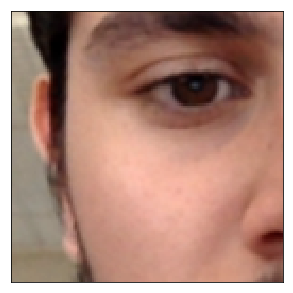

target: left
pred  :center


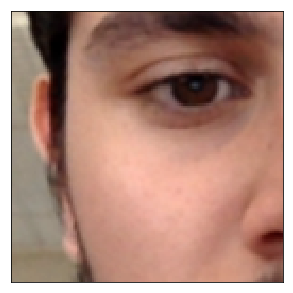

target: left
pred  :blink


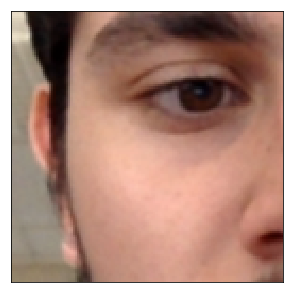

target: left
pred  :blink


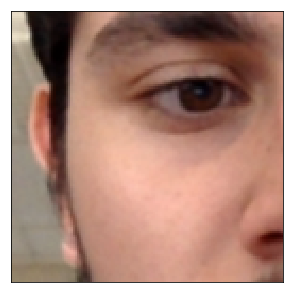

target: left
pred  :blink


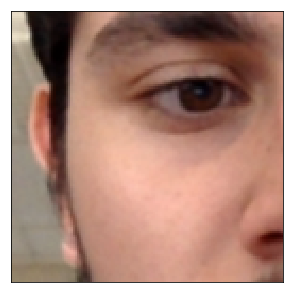

target: left
pred  :center


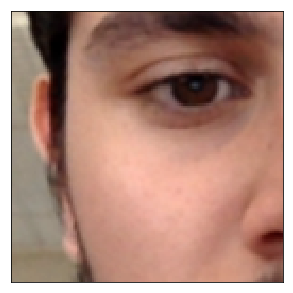

target: left
pred  :blink


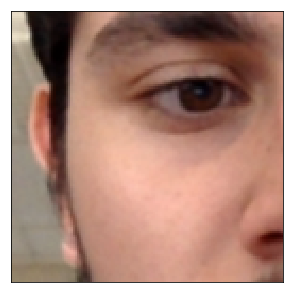

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

for data, labels in ml.dataset.test_loader:
    fig, ax = ml.show(only_wrong=True)
    plt.show() 
